<a href="https://colab.research.google.com/github/So-That/sothat-nlp/blob/main/CosineSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-8-b0083c36dad7>:97: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-b0083c36dad7>:97: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-b0083c36dad7>:97: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-b0083c36dad7>:97: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-b0083c36dad7>:97: UserWarning: Glyph 49912 (\N{HANGUL SYLLABLE SSA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-b0083c36dad7>:97: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-b0083c36dad7>:97: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-8-

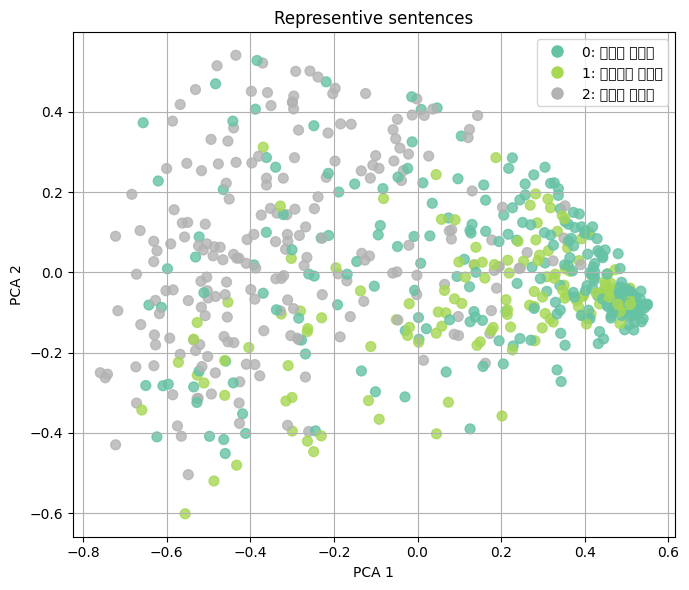


[클러스터 0] 가격이 비싸요 (247개)
6. 12미니를 4년 사용하다가 돈이 생겨서 고민햇는데 도움이 많이 되었어요
7. 너무나도 유용해요
10. AR코팅 설명 지운건 진짜 비호다
14. 15pro vs 16일반 이거 진짜 올해 최대의 난제네
15. 16e보고 16다시보러 왔습니다
17. 일반은 그냥 2024년에 60hz라는 것만해도 하자있는 것 같아서 사기싫음
18. AR코팅 뺀거 ㄹ 기만임
21. 진짜 설명 맛드러지게 정확히 너무 잘해주시네요 구독 박고 갑니다
22. 이걸 16프로로 보고 있는 앱등이들은 개추
23. 한달째 아이폰 고민중인 갤 유저에용 s24화면 반짝임 앱튕김 GPS불량으로 13년만에 다시 갤럭시로 돌아가려는 1인 잇섭님 영상 진짜 좋네용 솔직하고 디테일해서 최고
24. 잇섭은 인트로만보고 없섭은 풀로보는게 한방에 해결하는 방법
26. 이것땜에 사전예약 안하고 존버했으면 개추
27. 넘나 고민했는데 잇섭 덕분에 해결
28. 13 43 이건 소비자 기망아님 출시할때 은근슬쩍 넣고 반응별로니깐 쏙빼버리는데 아무도 문제제기를안하네
34. 이번에 12미니쓰다 16프로 구매했는데 120hz라는 독이든성배를 마신것 같아요 이제 일반에 120 안 넣어주면 일반으로 못 돌아 갈 수 밖에 없어
36. 이것만 기다렸습니다 보험도 있네
37. 역시 인트로 장인이십니다 이걸 바로 하시다니
38. 형 ㄹ 이거만 기달렸어
40. 15 27 이거 진짜
43. 저두 고민이예요 16프로 16일반 뭐가 좋을까요
45. 저도 이번에는 카카오 들려구요 애캐 2년동안은 아무 문제없다가 2년 반에 배터리 75 되버리고 방탄케이스 믿고 하도 떨궜더니 프레임에 유격이 크다고 배터리갈다 액정 나갈 것 같대서 그냥 16 주문했어요 카카오는 최대 5회 횟수 제한 있지만 방탄케이스 쓰면서 버티면 3년까지 보험되니 제 성향에는 적당할 것 같아요
53. 이번에 사면 생폰으로 쓸거라 애케플들까 고민햇엇는데 카카오보험이 생각보다 더 싸네여 애케플처럼 양도 이전이나 중간에 환불할 수 잇나여 할

In [8]:
from sentence_transformers import SentenceTransformer, util
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import json
import re

# 댓글 전처리
with open('stopwords.txt', 'r', encoding='utf-8-sig') as f:
    stopwords = set(f.read().split(","))

# 댓글 전처리 함수
def clean_and_tokenize(text, stopwords):
    text = re.sub(r"<.*?>", " ", text)  # HTML 태그 제거
    text = re.sub(r"[^\w\s가-힣]", " ", text)  # 특수문자 제거
    text = re.sub(r"(ㅋ|ㅎ|ㅜ|ㅠ|ㄷ|ㅌ|ㄱ|ㅂ|ㅇ|ㄴ|ㅅ|ㅈ|ㅊ){1,}", " ", text)  # 반복 자음 제거
    text = re.sub(r"\s+", " ", text).strip()  # 공백 정리
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords]
    return " ".join(tokens)

def preprocess_comments(json_path, stopword_path, output_path):

    with open(stopword_path, 'r', encoding='utf-8-sig') as f:
        stopwords = set(f.read().split(","))

    # JSON 댓글 데이터 불러오기
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # reply 필드만 추출
    sentences = [item["reply"] for item in data if "reply" in item and isinstance(item["reply"], str)]

    # 전처리
    processed_data = [{"reply": clean_and_tokenize(s, stopwords)} for s in sentences]

    # 저장
    with open(output_path, 'w', encoding='utf-8') as f:
        json.dump(processed_data, f, ensure_ascii=False, indent=2)

    return processed_data

# 1. 대표 문장 정의
category_representatives = {
 0:"가격이 비싸요",
 1:"디자인이 이뻐요",
 2:"성능이 좋아요"
}

# 2. SBERT 모델
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

# 3. 임베딩


processed_data = preprocess_comments('response_600.json', 'stopwords.txt', 'clean_response_600.json')
processed_data = [item["reply"] for item in processed_data]
rep_sentences = list(category_representatives.values())
rep_embeddings = model.encode(rep_sentences, normalize_embeddings=True)
comment_embeddings = model.encode(processed_data, normalize_embeddings=True)

# 4. 클러스터 할당
clustered_comments = {i: [] for i in category_representatives.keys()}
comment_labels = []  # 각 댓글이 속한 클러스터 인덱스

for i, emb in enumerate(comment_embeddings):
    sims = util.dot_score(emb, rep_embeddings)[0].cpu().numpy()
    best_cluster = np.argmax(sims)
    comment_labels.append(best_cluster)
    clustered_comments[best_cluster].append((i, processed_data[i]))


def visualize_clusters(embeddings, labels, title, category_representatives):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(embeddings)

    plt.figure(figsize=(7, 6))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='Set2', s=50, alpha=0.8)

    handles = [
        plt.Line2D(
            [0], [0],
            marker='o',
            color='w',
            label=f"{i}: {category_representatives[i]}",
            markerfacecolor=scatter.cmap(scatter.norm(i)),
            markersize=10
        )
        for i in sorted(category_representatives.keys())
    ]
    plt.legend(handles=handles, loc='best')

    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 실행
visualize_clusters(
    comment_embeddings,
    comment_labels,
    "Representive sentences",
    category_representatives
)

# 6. 결과 출력
for cluster_id, comments in clustered_comments.items():
    print(f"\n[클러스터 {cluster_id}] {category_representatives[cluster_id]} ({len(comments)}개)")
    for idx, sentence in comments:
        print(f"{idx+1}. {sentence}")
